In [8]:
library("tidyverse")
library("dplyr")
library("zoo")
library("pomp")

In [9]:
setwd("~/Desktop/School/research/pf_mobility")

In [35]:
source("scripts/read_data.R")
source("constants/file_loc.R")
source("constants/serial_interval.R")

source("functions/d_measure.R")
source("functions/r_process.R")
source("functions/disc_gamma.R")
source("functions/run_pfilter.R")
source("functions/simulate_data.R")
source("functions/get_renewal.R")
source("functions/get_true_rt.R")

In [20]:
alldata = read.csv('data/WHO-COVID-19-global-data.csv')
idcountry = which(alldata$Country == 'New Zealand')
Iday = alldata$New_cases[idcountry]
Iday <- rollmean(Iday, k=7, fill=NA)
Iday <- na.omit(Iday)
covid_nz <- data.frame(y = round(Iday), idx = 1:length(Iday))

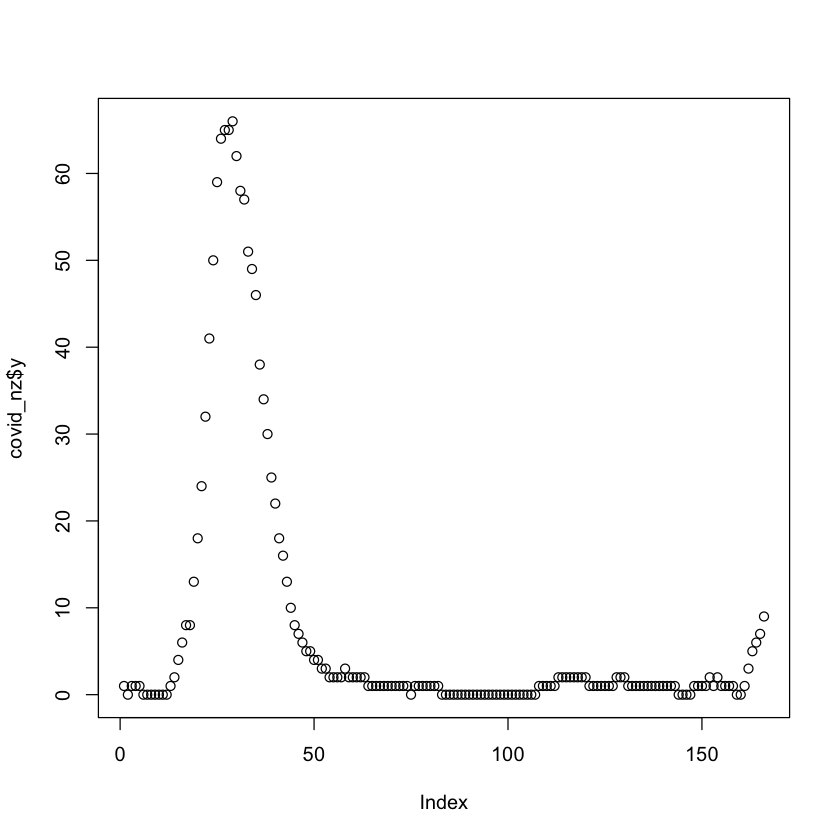

In [21]:
plot(covid_nz$y)

In [29]:
covid_nz_rt <- get_true_rt(covid_nz$y, shape = 2.3669, scale = 2.7463)
covid_nz_lamb <- get_lambda(covid_nz$y, shape = 2.3669, scale = 2.7463)

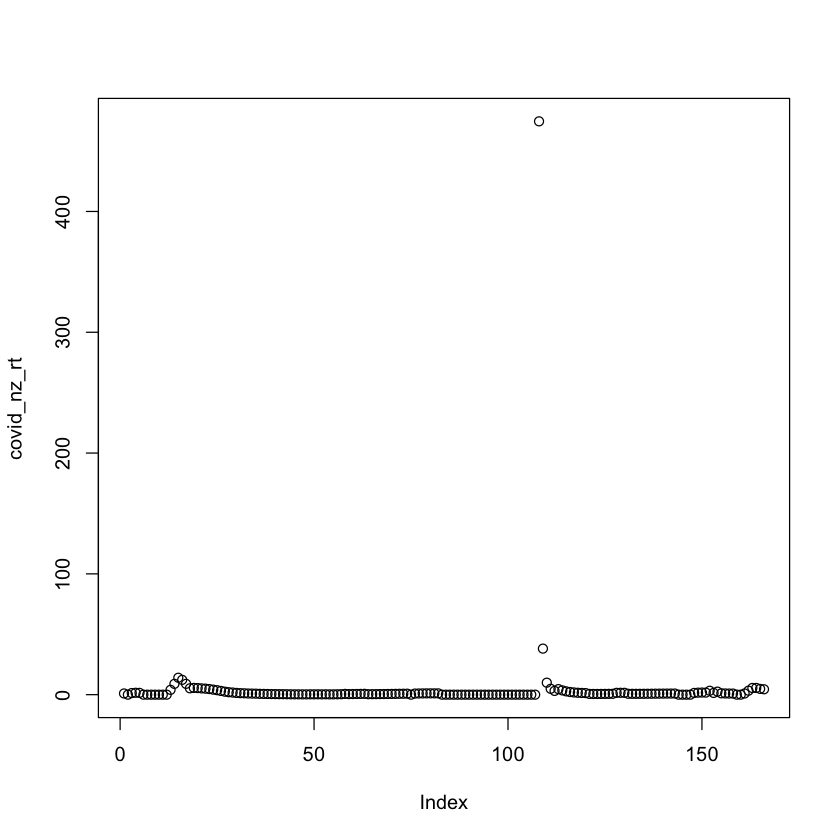

In [30]:
plot(covid_nz_rt)

In [26]:
which.max(covid_nz_rt)

[1] 108

In [33]:
max(covid_nz_rt)

[1] 474.6034

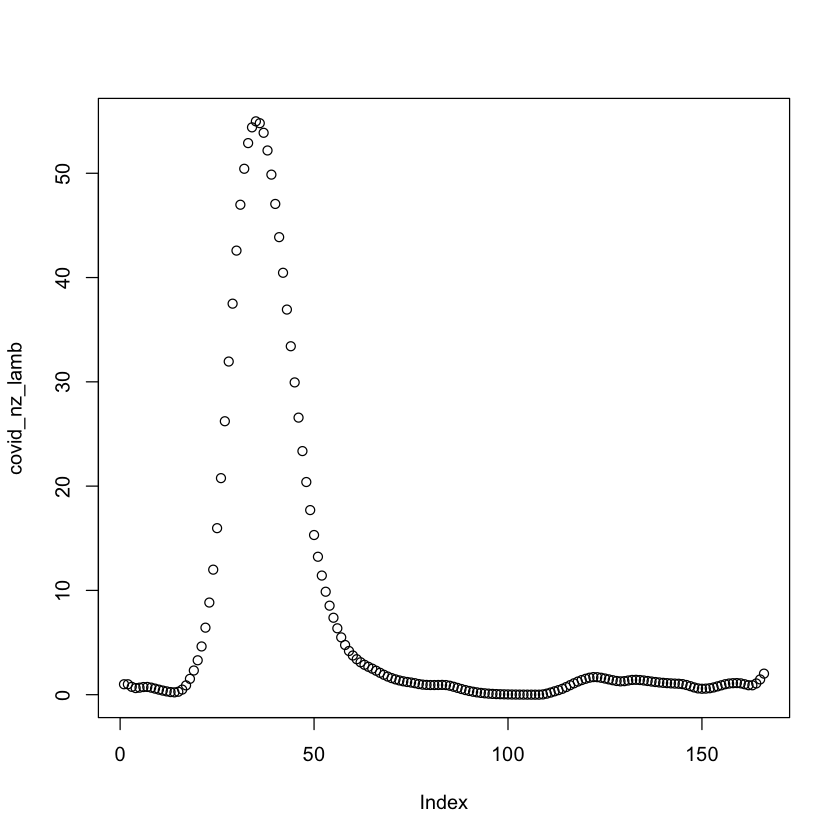

In [31]:
plot(covid_nz_lamb)

In [32]:
covid_nz_lamb[100:110]

[1] 0.024379828 0.018120427 0.013425719 0.009918813 0.007308715 0.005372481
 [7] 0.003940429 0.002884164 0.002107023 0.026234515 0.100728341

In [27]:
covid_nz$y[100:110]

[1] 0 0 0 0 0 0 0 0 1 1 1

In [34]:
1/0.002107

[1] 474.6084

In [24]:
nz_filter <- run_pfilter(rprocess_config = tran_normal_epifilter, dmeasure_config = meas_pois, data = covid_nz,
                       Np = 500, x_init = 1, shape = 2.3669, scale = 2.7463)

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



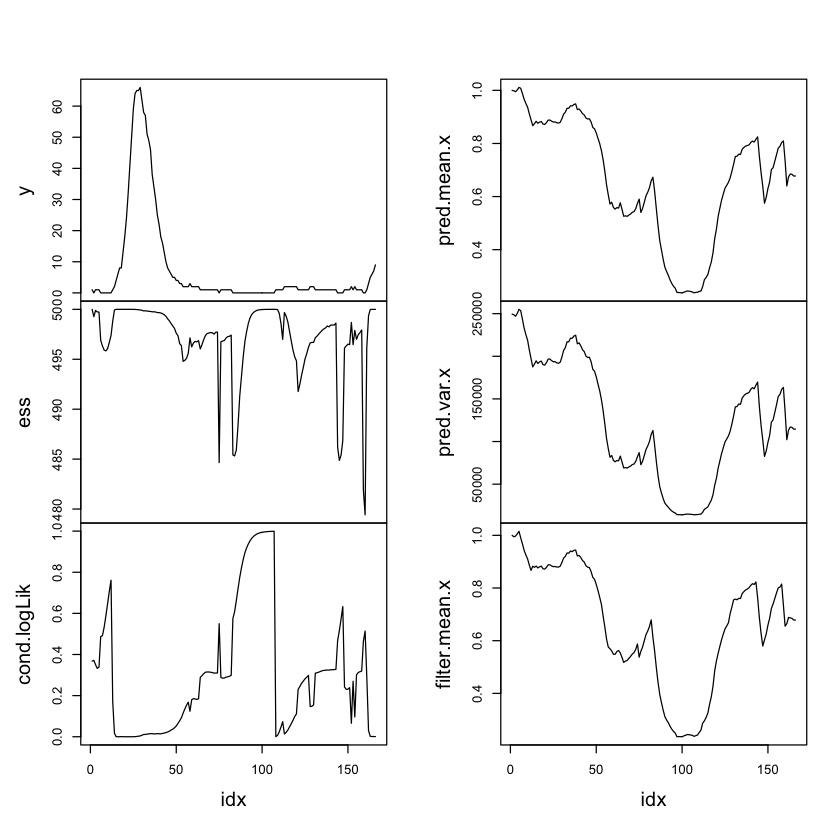

In [25]:
plot(nz_filter)